In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
df = pd.read_csv('100KStories.csv')
df.head()

,storyid,storytitle,sentence1,sentence2,sentence3,sentence4,sentence5
0,9a51198e-96f1-42c3-b09d-a3e1e067d803,Overweight Kid,Dan's parents were overweight.,Dan was overweight as well.,The doctors told his parents it was unhealthy.,His parents understood and decided to make a c...,They got themselves and Dan on a diet.
1,617e7ada-3878-488d-bd56-40695b91f053,The Bike Accident,Carrie had just learned how to ride a bike.,She didn't have a bike of her own.,Carrie would sneak rides on her sister's bike.,She got nervous on a hill and crashed into a w...,The bike frame bent and Carrie got a deep gash...
2,79b0da1f-e460-4173-ba58-8c9e2553c53a,Beach,Morgan enjoyed long walks on the beach.,She and her boyfriend decided to go for a long...,"After walking for over a mile, something happe...",Morgan decided to propose to her boyfriend.,Her boyfriend was upset he didn't propose to h...
3,d173b7de-4611-4cdf-934c-912834755e41,The bad customer.,Jane was working at a diner.,"Suddenly, a customer barged up to the counter.",He began yelling about how long his food was t...,Jane didn't know how to react.,"Luckily, her coworker intervened and calmed th..."
4,af0fd5a4-de36-47ba-8aa2-e99d10986d7a,Being Patient,I was talking to my crush today.,She continued to complain about guys flirting ...,I decided to agree with what she says and list...,"After I got home, I got a text from her.",She asked if we can hang out tomorrow.


In [5]:
df.drop(columns=['storyid', 'storytitle'], inplace=True)

In [6]:
df.head()

,sentence1,sentence2,sentence3,sentence4,sentence5
0,Dan's parents were overweight.,Dan was overweight as well.,The doctors told his parents it was unhealthy.,His parents understood and decided to make a c...,They got themselves and Dan on a diet.
1,Carrie had just learned how to ride a bike.,She didn't have a bike of her own.,Carrie would sneak rides on her sister's bike.,She got nervous on a hill and crashed into a w...,The bike frame bent and Carrie got a deep gash...
2,Morgan enjoyed long walks on the beach.,She and her boyfriend decided to go for a long...,"After walking for over a mile, something happe...",Morgan decided to propose to her boyfriend.,Her boyfriend was upset he didn't propose to h...
3,Jane was working at a diner.,"Suddenly, a customer barged up to the counter.",He began yelling about how long his food was t...,Jane didn't know how to react.,"Luckily, her coworker intervened and calmed th..."
4,I was talking to my crush today.,She continued to complain about guys flirting ...,I decided to agree with what she says and list...,"After I got home, I got a text from her.",She asked if we can hang out tomorrow.


In [10]:
texts = []
for i in range(len(df)):
    text = ''
    for j in range(1, 6):
        text += df[f'sentence{j}'][i] + ' '
        
    texts.append(text.strip())

In [12]:
lens = [len(t.split()) for t in texts]

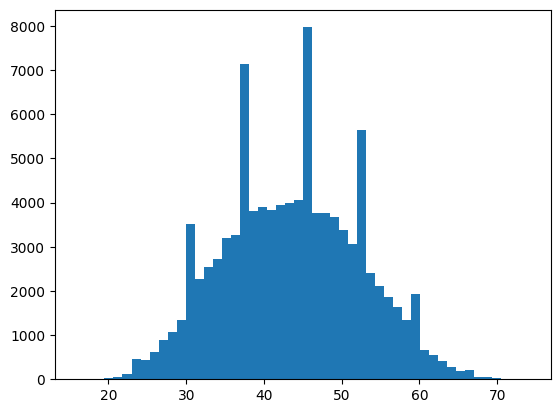

In [14]:
plt.hist(lens, bins=50);

In [24]:
with open('validation.txt', 'w') as f:
    f.write('\n'.join(texts[-5000:-4000]))

In [16]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [19]:
lens = []
for t in texts:
    lens.append(len(tokenizer(t)['input_ids']))

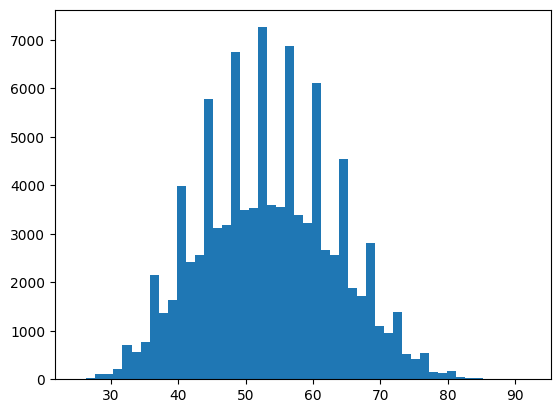

In [20]:
plt.hist(lens, bins=50);